# Analyzing Data for Solution Gas-Oil Ratio

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as ss
import matplotlib.pyplot as plt
%matplotlib inline

# Import Data

In [2]:
df = pd.read_csv('project_data.csv')

In [3]:
df

,Rst,SGoil,SGgas,Psp,Tsp
0,scf/STB,Sgwater=1.0,SGair=1.0,PSI,deg F
1,1.608311631,0.8,0.6,15,70
2,11.90248659,0.61,0.88,69,72
3,10.6736522,0.58,0.66,80,62
4,7.70841785,0.88,0.81,199,88
5,4.341078559,0.76,0.62,86,122
6,13.21936011,0.61,0.74,141,95
7,6.911217789,0.83,0.83,124,90
8,4.483643127,0.9,0.82,82,86
9,4.225543993,0.67,0.73,36,135


# Statistical Analysis

In [4]:
#Data Cleaning

In [5]:
df = pd.read_csv('project_data.csv')
df['Rst'] = df['Rst'].str.replace('scf/STB','').str.replace(',','')
df['SGoil'] = df['SGoil'].str.replace('Sgwater=1.0','').str.replace(',','')
df['SGgas'] = df['SGgas'].str.replace('SGair=1.0','').str.replace(',','')
df['Psp'] = df['Psp'].str.replace('PSI','').str.replace(',','')
df['Tsp'] = df['Tsp'].str.replace('deg F','').str.replace(',','')
print(df.head())

           Rst SGoil SGgas  Psp Tsp
0                                  
1  1.608311631   0.8   0.6   15  70
2  11.90248659  0.61  0.88   69  72
3   10.6736522  0.58  0.66   80  62
4   7.70841785  0.88  0.81  199  88


In [6]:
df

,Rst,SGoil,SGgas,Psp,Tsp
0,,,,,
1,1.608311631,0.8,0.6,15,70
2,11.90248659,0.61,0.88,69,72
3,10.6736522,0.58,0.66,80,62
4,7.70841785,0.88,0.81,199,88
5,4.341078559,0.76,0.62,86,122
6,13.21936011,0.61,0.74,141,95
7,6.911217789,0.83,0.83,124,90
8,4.483643127,0.9,0.82,82,86
9,4.225543993,0.67,0.73,36,135


In [7]:
df.drop([0], axis=0)

,Rst,SGoil,SGgas,Psp,Tsp
1,1.608311631,0.8,0.6,15,70
2,11.90248659,0.61,0.88,69,72
3,10.6736522,0.58,0.66,80,62
4,7.70841785,0.88,0.81,199,88
5,4.341078559,0.76,0.62,86,122
6,13.21936011,0.61,0.74,141,95
7,6.911217789,0.83,0.83,124,90
8,4.483643127,0.9,0.82,82,86
9,4.225543993,0.67,0.73,36,135
10,10.43997082,0.7,0.66,154,53


In [8]:
# columns were showing as objects, therefore mean, median, etc. could not be ran. I had to convert the data to numeric values.

In [9]:
df.dtypes

Rst      object
SGoil    object
SGgas    object
Psp      object
Tsp      object
dtype: object

In [10]:
df = df.convert_objects(convert_numeric=True)
df.dtypes

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use DataFrame.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  """Entry point for launching an IPython kernel.


Rst      float64
SGoil    float64
SGgas    float64
Psp      float64
Tsp      float64
dtype: object

In [11]:
df.describe()

,Rst,SGoil,SGgas,Psp,Tsp
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,7.436124,0.743520,0.741680,107.629000,94.852000
std,3.777297,0.097124,0.094335,54.240164,25.797279
min,1.351996,0.580000,0.580000,15.000000,50.000000
25%,4.646156,0.660000,0.660000,63.750000,72.000000
50%,6.766796,0.750000,0.740000,108.000000,94.000000
75%,9.519505,0.830000,0.820000,153.000000,117.000000
max,22.163125,0.900000,0.900000,200.000000,140.000000


In [12]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Rst       4.873349
SGoil     0.170000
SGgas     0.160000
Psp      89.250000
Tsp      45.000000
dtype: float64


In [13]:
#Testing for outliers, False = not an outlier, True = outlier
print(df < (Q1 - 1.5 * IQR))
print(df > (Q3 + 1.5 * IQR))

        Rst  SGoil  SGgas    Psp    Tsp
0     False  False  False  False  False
1     False  False  False  False  False
2     False  False  False  False  False
3     False  False  False  False  False
4     False  False  False  False  False
5     False  False  False  False  False
6     False  False  False  False  False
7     False  False  False  False  False
8     False  False  False  False  False
9     False  False  False  False  False
10    False  False  False  False  False
11    False  False  False  False  False
12    False  False  False  False  False
13    False  False  False  False  False
14    False  False  False  False  False
15    False  False  False  False  False
16    False  False  False  False  False
17    False  False  False  False  False
18    False  False  False  False  False
19    False  False  False  False  False
20    False  False  False  False  False
21    False  False  False  False  False
22    False  False  False  False  False
23    False  False  False  False  False


In [14]:
#Before Outliers were removed
df.shape

(1001, 5)

In [15]:
#After Outliers were removed
df_out = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
df_out.shape

(975, 5)

In [16]:
df = df_out.drop([0], axis=0)

# Graph Rst vs Every variable

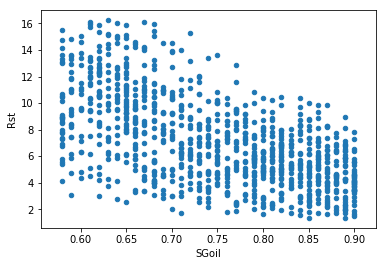

In [17]:
df.plot.scatter("SGoil", "Rst")
plt.show()

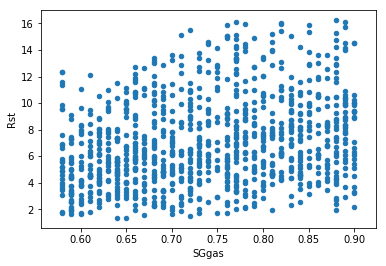

In [18]:
df.plot.scatter("SGgas", "Rst")
plt.show()

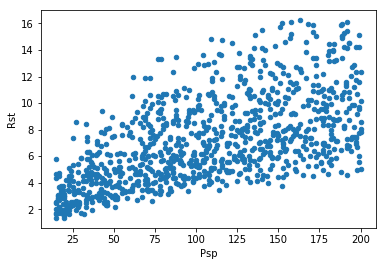

In [19]:
df.plot.scatter("Psp", "Rst")
plt.show()

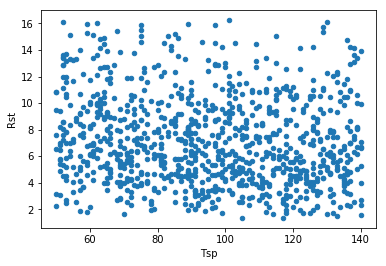

In [20]:
df.plot.scatter("Tsp", "Rst")
plt.show()

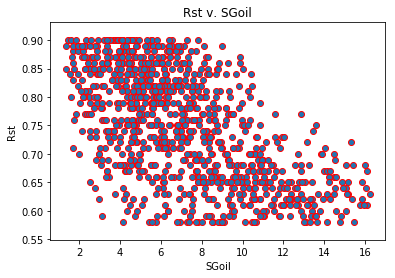

In [21]:
Rst = df['Rst']
SGoil = df['SGoil']
plt.scatter(Rst, SGoil , edgecolors='r')
plt.xlabel('SGoil')
plt.ylabel('Rst')
plt.title('Rst v. SGoil')
plt.show()

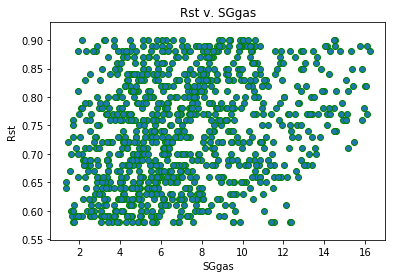

In [22]:
Rst = df['Rst']
SGgas = df['SGgas']
plt.scatter(Rst, SGgas , edgecolors='g')
plt.xlabel('SGgas')
plt.ylabel('Rst')
plt.title('Rst v. SGgas')
plt.show()

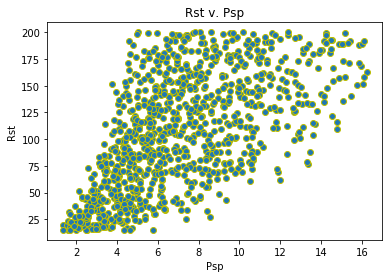

In [23]:
Rst = df['Rst']
Psp = df['Psp']
plt.scatter(Rst, Psp , edgecolors='y')
plt.xlabel('Psp')
plt.ylabel('Rst')
plt.title('Rst v. Psp')
plt.show()

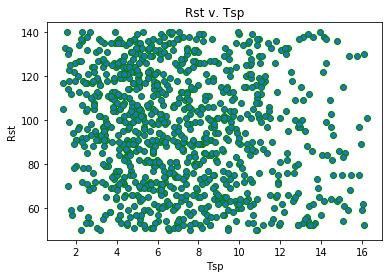

In [24]:
Rst = df['Rst']
Tsp = df['Tsp']
plt.scatter(Rst, Tsp , edgecolors='g')
plt.xlabel('Tsp')
plt.ylabel('Rst')
plt.title('Rst v. Tsp')
plt.show()

# Take Log of Data to Simplify

In [25]:
df['log_Rst']=np.log(df.Rst)
df['inv_SGoil']=1/df.SGoil
df['inv_SGgas']=1/df.SGgas
df['inv_Psp']=1/df.Psp
df['inv_Tsp']=1/df.Tsp
df

,Rst,SGoil,SGgas,Psp,Tsp,log_Rst,inv_SGoil,inv_SGgas,inv_Psp,inv_Tsp
1,1.608312,0.80,0.60,15.0,70.0,0.475185,1.250000,1.666667,0.066667,0.014286
2,11.902487,0.61,0.88,69.0,72.0,2.476747,1.639344,1.136364,0.014493,0.013889
3,10.673652,0.58,0.66,80.0,62.0,2.367778,1.724138,1.515152,0.012500,0.016129
4,7.708418,0.88,0.81,199.0,88.0,2.042313,1.136364,1.234568,0.005025,0.011364
5,4.341079,0.76,0.62,86.0,122.0,1.468123,1.315789,1.612903,0.011628,0.008197
6,13.219360,0.61,0.74,141.0,95.0,2.581682,1.639344,1.351351,0.007092,0.010526
7,6.911218,0.83,0.83,124.0,90.0,1.933146,1.204819,1.204819,0.008065,0.011111
8,4.483643,0.90,0.82,82.0,86.0,1.500436,1.111111,1.219512,0.012195,0.011628
9,4.225544,0.67,0.73,36.0,135.0,1.441148,1.492537,1.369863,0.027778,0.007407
10,10.439971,0.70,0.66,154.0,53.0,2.345642,1.428571,1.515152,0.006494,0.018868


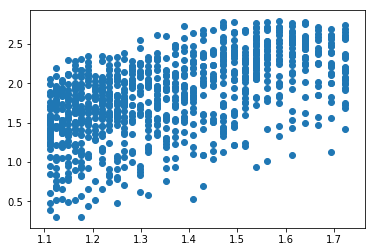

In [26]:
plt.scatter(df.inv_SGoil,df.log_Rst)
plt.show()

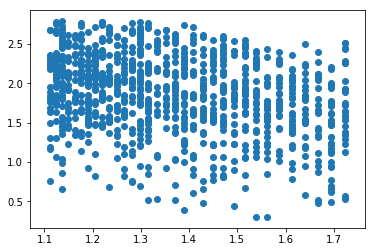

In [27]:
plt.scatter(df.inv_SGgas,df.log_Rst)
plt.show()

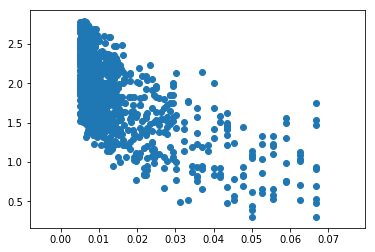

In [28]:
plt.scatter(df.inv_Psp,df.log_Rst)
plt.show()

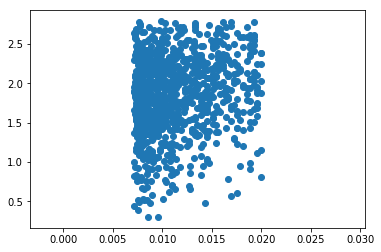

In [29]:
plt.scatter(df.inv_Tsp,df.log_Rst)
plt.show()

In [30]:
pip install -U scikit-learn


The following command must be run outside of the IPython shell:

    $ pip install -U scikit-learn

The Python package manager (pip) can only be used from outside of IPython.
Please reissue the `pip` command in a separate terminal or command prompt.

See the Python documentation for more information on how to install packages:

    https://docs.python.org/3/installing/


# Find an equation for Rst

In [31]:
import statsmodels.api as sm

In [32]:
import statsmodels.formula.api as smf

In [33]:
from sklearn import linear_model 

In [34]:
df

,Rst,SGoil,SGgas,Psp,Tsp,log_Rst,inv_SGoil,inv_SGgas,inv_Psp,inv_Tsp
1,1.608312,0.80,0.60,15.0,70.0,0.475185,1.250000,1.666667,0.066667,0.014286
2,11.902487,0.61,0.88,69.0,72.0,2.476747,1.639344,1.136364,0.014493,0.013889
3,10.673652,0.58,0.66,80.0,62.0,2.367778,1.724138,1.515152,0.012500,0.016129
4,7.708418,0.88,0.81,199.0,88.0,2.042313,1.136364,1.234568,0.005025,0.011364
5,4.341079,0.76,0.62,86.0,122.0,1.468123,1.315789,1.612903,0.011628,0.008197
6,13.219360,0.61,0.74,141.0,95.0,2.581682,1.639344,1.351351,0.007092,0.010526
7,6.911218,0.83,0.83,124.0,90.0,1.933146,1.204819,1.204819,0.008065,0.011111
8,4.483643,0.90,0.82,82.0,86.0,1.500436,1.111111,1.219512,0.012195,0.011628
9,4.225544,0.67,0.73,36.0,135.0,1.441148,1.492537,1.369863,0.027778,0.007407
10,10.439971,0.70,0.66,154.0,53.0,2.345642,1.428571,1.515152,0.006494,0.018868


In [35]:
X = df[['inv_SGoil','inv_SGgas','inv_Psp','inv_Tsp']]

Y = df['log_Rst']

regr = linear_model.LinearRegression()
regr.fit(X, Y)

print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

X = sm.add_constant(X) # adding a constant
 
model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 
 
print_model = model.summary()
print(print_model)

Intercept: 
 0.8958696604244301
Coefficients: 
 [  1.68856897  -0.88898866 -27.83193029  25.04218159]
                            OLS Regression Results                            
Dep. Variable:                log_Rst   R-squared:                       0.928
Model:                            OLS   Adj. R-squared:                  0.928
Method:                 Least Squares   F-statistic:                     3118.
Date:                Thu, 02 May 2019   Prob (F-statistic):               0.00
Time:                        14:19:35   Log-Likelihood:                 569.01
No. Observations:                 974   AIC:                            -1128.
Df Residuals:                     969   BIC:                            -1104.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------

In [36]:
# Above I used all of the variables to come up with Variables for an equation for Rst

In conclusion, the R-squared is .928, which is a very good correlation being that is is so close to 1. By looking at the charts for the single Rst vs. each variable independently the correclations weren't very good. After combinig the Rst vs. each variable together, the correlation became evident.

In [37]:
predictions = model.predict(X)
print(predictions)

1       0.027217
2       2.598248
3       2.516250
4       1.861892
5       1.565455
6       2.528892
7       1.913015
8       1.639699
9       1.610718
10      2.252926
11      1.527602
12      2.200758
13      1.194880
14      2.106203
15      2.294573
16      1.842116
17      1.667607
18      1.526281
19      1.474267
20      2.561942
21      2.132796
22      2.674960
23      1.933770
24      2.140779
25      1.563681
26      2.192097
27      2.042392
28      2.033907
29      0.924755
30      2.597359
          ...   
971     1.733297
972     1.239306
973     2.508850
974     1.755453
975     1.531868
976     2.092275
977     2.408397
978     1.828226
979     2.238057
980     0.509038
981     0.732381
982     1.886774
983     2.298548
984     1.695852
985     1.797656
986     0.881024
987     1.584025
988     1.407812
989     1.750805
990     1.682778
991     1.340796
992     2.014685
993     2.225661
994     1.423467
995     1.571602
996     1.783030
997     1.878545
998     1.6677

In [38]:
df.corr(method ='kendall')

,Rst,SGoil,SGgas,Psp,Tsp,log_Rst,inv_SGoil,inv_SGgas,inv_Psp,inv_Tsp
Rst,1.000000,-0.404588,0.189503,0.459821,-0.094063,1.000000,0.404588,-0.189503,-0.459821,0.094063
SGoil,-0.404588,1.000000,0.014176,0.047771,-0.012971,-0.404588,-1.000000,-0.014176,-0.047771,0.012971
SGgas,0.189503,0.014176,1.000000,-0.026852,-0.005977,0.189503,-0.014176,-1.000000,0.026852,0.005977
Psp,0.459821,0.047771,-0.026852,1.000000,0.026601,0.459821,-0.047771,0.026852,-1.000000,-0.026601
Tsp,-0.094063,-0.012971,-0.005977,0.026601,1.000000,-0.094063,0.012971,0.005977,-0.026601,-1.000000
log_Rst,1.000000,-0.404588,0.189503,0.459821,-0.094063,1.000000,0.404588,-0.189503,-0.459821,0.094063
inv_SGoil,0.404588,-1.000000,-0.014176,-0.047771,0.012971,0.404588,1.000000,0.014176,0.047771,-0.012971
inv_SGgas,-0.189503,-0.014176,-1.000000,0.026852,0.005977,-0.189503,0.014176,1.000000,-0.026852,-0.005977
inv_Psp,-0.459821,-0.047771,0.026852,-1.000000,-0.026601,-0.459821,0.047771,-0.026852,1.000000,0.026601
inv_Tsp,0.094063,0.012971,0.005977,-0.026601,-1.000000,0.094063,-0.012971,-0.005977,0.026601,1.000000


In [39]:
# Individual correlations above

In [40]:
df.plot.scatter(x=df[['inv_SGoil','inv_SGgas','inv_Psp','inv_Tsp']],y=predictions)
plt.show()

ValueError: Must pass DataFrame with boolean values only

In [41]:
df['Predictions']= predictions

In [42]:
df

,Rst,SGoil,SGgas,Psp,Tsp,log_Rst,inv_SGoil,inv_SGgas,inv_Psp,inv_Tsp,Predictions
1,1.608312,0.80,0.60,15.0,70.0,0.475185,1.250000,1.666667,0.066667,0.014286,0.027217
2,11.902487,0.61,0.88,69.0,72.0,2.476747,1.639344,1.136364,0.014493,0.013889,2.598248
3,10.673652,0.58,0.66,80.0,62.0,2.367778,1.724138,1.515152,0.012500,0.016129,2.516250
4,7.708418,0.88,0.81,199.0,88.0,2.042313,1.136364,1.234568,0.005025,0.011364,1.861892
5,4.341079,0.76,0.62,86.0,122.0,1.468123,1.315789,1.612903,0.011628,0.008197,1.565455
6,13.219360,0.61,0.74,141.0,95.0,2.581682,1.639344,1.351351,0.007092,0.010526,2.528892
7,6.911218,0.83,0.83,124.0,90.0,1.933146,1.204819,1.204819,0.008065,0.011111,1.913015
8,4.483643,0.90,0.82,82.0,86.0,1.500436,1.111111,1.219512,0.012195,0.011628,1.639699
9,4.225544,0.67,0.73,36.0,135.0,1.441148,1.492537,1.369863,0.027778,0.007407,1.610718
10,10.439971,0.70,0.66,154.0,53.0,2.345642,1.428571,1.515152,0.006494,0.018868,2.252926


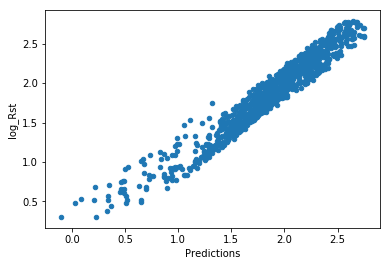

In [47]:
df.plot.scatter("Predictions", "log_Rst")
plt.show()

$y = x^2$ #LATEX Equations inside of dollar signs

In [48]:
df['log_SGoil']=np.log(df.SGoil)
df['log_SGgas']=np.log(df.SGgas)
df['log_Psp']=np.log(df.Psp)
df['log_Tsp']=np.log(df.Tsp)
df['exp_predictions']=np.exp(df.Predictions)
df

,Rst,SGoil,SGgas,Psp,Tsp,log_Rst,inv_SGoil,inv_SGgas,inv_Psp,inv_Tsp,Predictions,log_SGoil,log_SGgas,log_Psp,log_Tsp,exp_predictions
1,1.608312,0.80,0.60,15.0,70.0,0.475185,1.250000,1.666667,0.066667,0.014286,0.027217,-0.223144,-0.510826,2.708050,4.248495,1.027590
2,11.902487,0.61,0.88,69.0,72.0,2.476747,1.639344,1.136364,0.014493,0.013889,2.598248,-0.494296,-0.127833,4.234107,4.276666,13.440169
3,10.673652,0.58,0.66,80.0,62.0,2.367778,1.724138,1.515152,0.012500,0.016129,2.516250,-0.544727,-0.415515,4.382027,4.127134,12.382076
4,7.708418,0.88,0.81,199.0,88.0,2.042313,1.136364,1.234568,0.005025,0.011364,1.861892,-0.127833,-0.210721,5.293305,4.477337,6.435905
5,4.341079,0.76,0.62,86.0,122.0,1.468123,1.315789,1.612903,0.011628,0.008197,1.565455,-0.274437,-0.478036,4.454347,4.804021,4.784851
6,13.219360,0.61,0.74,141.0,95.0,2.581682,1.639344,1.351351,0.007092,0.010526,2.528892,-0.494296,-0.301105,4.948760,4.553877,12.539602
7,6.911218,0.83,0.83,124.0,90.0,1.933146,1.204819,1.204819,0.008065,0.011111,1.913015,-0.186330,-0.186330,4.820282,4.499810,6.773479
8,4.483643,0.90,0.82,82.0,86.0,1.500436,1.111111,1.219512,0.012195,0.011628,1.639699,-0.105361,-0.198451,4.406719,4.454347,5.153619
9,4.225544,0.67,0.73,36.0,135.0,1.441148,1.492537,1.369863,0.027778,0.007407,1.610718,-0.400478,-0.314711,3.583519,4.905275,5.006403
10,10.439971,0.70,0.66,154.0,53.0,2.345642,1.428571,1.515152,0.006494,0.018868,2.252926,-0.356675,-0.415515,5.036953,3.970292,9.515535


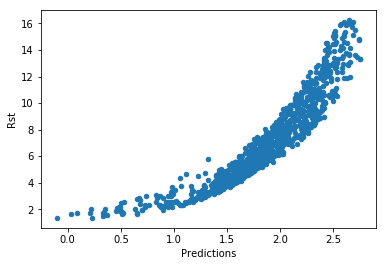

In [49]:
df.plot.scatter("Predictions", "Rst")
plt.show()

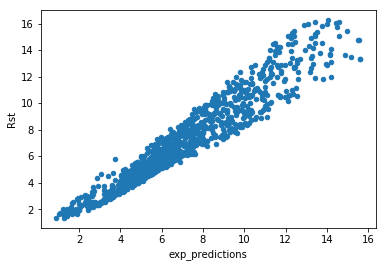

In [50]:
df.plot.scatter("exp_predictions", "Rst")
plt.show()

In [51]:
X = df[['log_SGoil','log_SGgas','log_Psp','log_Tsp']]

Y = df['log_Rst']

regr = linear_model.LinearRegression()
regr.fit(X, Y)

print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

X = sm.add_constant(X) # adding a constant
 
model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 
 
print_model = model.summary()
print(print_model)

Intercept: 
 0.3817999999819339
Coefficients: 
 [-2.39122542  1.26032259  0.57630878 -0.31942359]
                            OLS Regression Results                            
Dep. Variable:                log_Rst   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 3.993e+21
Date:                Thu, 02 May 2019   Prob (F-statistic):               0.00
Time:                        17:19:36   Log-Likelihood:                 20837.
No. Observations:                 974   AIC:                        -4.166e+04
Df Residuals:                     969   BIC:                        -4.164e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------

Wow! When plotting the log instead of the inverse of each data set the correlation changed to 1, which is a perfect correlation.

$y = -2.39x^2 + 1.26z^2 + 0.5763c^2 - 0.319v^2 + 0.381$